# Exploring Predictive Models for Diabetes Diagnosis

## Importing Libraries

In [108]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from ydata_profiling import ProfileReport

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier

import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


%matplotlib inline

## Data Staging

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Diabetes_Tenary_Classification.csv')
df.head(30)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1               0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2               0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3               0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4               0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5               0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6               0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7               0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8               1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9               0.0     0.0       0.0        1.0  24.0     0.0     0.0   
10              1.0     0.0       0.0        1.0  25.0     1.0     0.0   
11              0.0     1.0       1.0        1.0  34.0     1.0     0.0   
12              0.0     0.0       0.0        1.0  26.0     1.0     0.0   
13              1.0     1.0       1.0        1.0  28.0     0.0     0.0   
14              0.0     0.0       1.0        1.0  33.0     1.0     1.0   
15              0.0     1.0       0.0        1.0  33.0     0.0     0.0   
16              0.0     1.0       1.0        1.0  21.0     0.0     0.0   
17              1.0     0.0       0.0        1.0  23.0     1.0     0.0   
18              0.0     0.0       0.0        0.0  23.0     0.0     0.0   
19              0.0     0.0       1.0        1.0  28.0     0.0     0.0   
20              0.0     1.0       1.0        1.0  22.0     0.0     1.0   
21              0.0     1.0       1.0        1.0  38.0     1.0     0.0   
22              0.0     0.0       0.0        1.0  28.0     1.0     0.0   
23              1.0     1.0       0.0        1.0  27.0     0.0     0.0   
24              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
25              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
26              1.0     1.0       1.0        1.0  37.0     1.0     1.0   
27              1.0     1.0       1.0        1.0  28.0     1.0     0.0   
28              1.0     1.0       1.0        1.0  27.0     1.0     0.0   
29              0.0     0.0       1.0        1.0  31.0     1.0     0.0   

    HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                    0.0           0.0     0.0      1.0                0.0   
1                    0.0           1.0     0.0      0.0                0.0   
2                    0.0           0.0     1.0      0.0                0.0   
3                    0.0           1.0     1.0      1.0                0.0   
4                    0.0           1.0     1.0      1.0                0.0   
5                    0.0           1.0     1.0      1.0                0.0   
6                    0.0           0.0     0.0      0.0                0.0   
7                    0.0           1.0     0.0      1.0                0.0   
8                    1.0           0.0     1.0      1.0                0.0   
9                    0.0           0.0     0.0      1.0                0.0   
10                   0.0           1.0     1.0      1.0                0.0   
11                   0.0           0.0     1.0      1.0                0.0   
12                   0.0           0.0     0.0      1.0                0.0   
13                   0.0           0.0     0.0      1.0                0.0   
14                   0.0           1.0     0.0      1.0                0.0   
15                   0.0           1.0     0.0      0.0                0.0   
16                   0.0           1.0     1.0      1.0                0.0   
17                   0.0           1.0     0.0      0.0                0.0   
18                   0.0           0.0     0.0      1.0                0.0   
19                   0.0           0.0     0.0      0.0                1.0   
20                   1.0           0.0     1.0      0.0                

In [4]:
df.tail(30)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253650              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
253651              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253652              1.0     0.0       1.0        1.0  27.0     0.0     0.0   
253653              0.0     0.0       0.0        1.0  33.0     1.0     0.0   
253654              0.0     0.0       0.0        1.0  26.0     1.0     0.0   
253655              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253656              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253657              0.0     0.0       1.0        1.0  24.0     0.0     0.0   
253658              0.0     0.0       0.0        0.0  27.0     0.0     0.0   
253659              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
253660              0.0     0.0       1.0        1.0  34.0     1.0     0.0   
253661              0.0     1.0       0.0        1.0  33.0     0.0     0.0   
253662              0.0     0.0       0.0        1.0  16.0     0.0     0.0   
253663              0.0     0.0       0.0        1.0  23.0     0.0     0.0   
253664              0.0     0.0       1.0        1.0  29.0     1.0     0.0   
253665              0.0     0.0       1.0        1.0  17.0     0.0     0.0   
253666              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253667              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
253668              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
253669              0.0     0.0       1.0        1.0  27.0     0.0     0.0   
253670              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
253671              0.0     1.0       1.0        1.0  23.0     0.0     1.0   
253672              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
253673              0.0     1.0       0.0        1.0  42.0     0.0     0.0   
253674              0.0     0.0       0.0        1.0  27.0     0.0     0.0   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
253650                   0.0           1.0     0.0      0.0   
253651                   0.0           1.0     1.0      1.0   
253652                   0.0           1.0     1.0      0.0   
253653                   0.0           0.0     1.0      1.0   
253654                   0.0           1.0     1.0      1.0   
253655                   0.0           1.0     1.0      1.0   
253656                   0.0           1.0     1.0      1.0   
253657                   0.0           0.0     0.0      1.0   
253658                   0.0           1.0     0.0      0.0   
253659                   0.0           0.0     0.0      1.0   
253660                   0.0           0.0     1.0      1.0   
253661                   0.0           1.0     0.0      1.0   
253662                   0.0           1.0     0.0      1.0   
253663                   0.0           0.0     1.0      0.0   
253664                   0.0           0.0     0.0      0.0   
253665                   0.0           0.0     0.0      0.0   
253666                   0.0           0.0     1.0      1.0   
253667                   0.0           0.0     0.0      1.0   
253668                   1.0           0.0     1.0      1.0   
253669                   0.0           0.0     0.0      1.0   
253670                   1.0           0.0     1.0      0.0   
253671                   1.0           0.0     0.0      0.0   
253672                   1.0           1.0     1.0      1.0   
253673                   0.0           1.0     1.0      1.0   
253674        

In [5]:
df = df.astype(int)

In [6]:
df.shape

(253680, 22)

In [7]:
Profile = ProfileReport(df, title = 'Diabetes Profile', explorative = True)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [8]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [10]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

In [11]:
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

In [12]:
df.head()

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0         0       1         1          1   40       1       0   
1         0       0         0          0   25       1       0   
2         0       1         1          1   28       0       0   
3         0       1         0          1   27       0       0   
4         0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5        18        15         1    0   
1              0            1        3         0         0         0    0   
2              1            1        5        30        30         1    0   
3              1            0        2         0         0         0    0   
4              1            0        2         3         0         0    0   

   Age  Education  Income  
0    9          4       3  
1    7          6       1  
2    9          4       8  
3   11          3       6  
4   11          5       4

In [13]:
df.isnull().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
df.duplicated().sum()

24206

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(229474, 22)

## Explanatory Data Analysis

In [18]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes                               2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [19]:
df.describe()

Diabetes         HighBP       HighChol      CholCheck  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.152945       0.454343       0.441640       0.959481   
std         0.359936       0.497912       0.496584       0.197173   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       0.000000              0.000000   
25%        24.000000       0.00000       0.000000              0.000000   
50%        27.000000       0.00000       0.000000              0.000000   
75%        32.000000       1.00000       0.000000              0.000000   
max        98.000000       1.00000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  229474.000000  229474.000000  229474.000000      229474.000000   
mean        0.733042       0.612675       0.794587           0.060791   
std         0.442371       0.487140       0.404004           0.238947   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.946011       0.092921       2.601820       3.509866   
std         0.225996       0.290323       1.064962       7.717643   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       3.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        4.681219       0.185751       0.439087       8.085068   
std         9.050877       0.388906       0.496277       3.094451   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         4.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  
count  229474.000000  229474.000000  
mean        4.979741       5.888615  
std         0.992989       2.092888  
min         1.000000       1.000000  
25%         4.000000       4.000000  
50%         5.000000       6.000000  
75%         6.000000       8.000000  
max         6.000000       8.000000

In [20]:
df.corr()

Diabetes    HighBP  HighChol  CholCheck       BMI  \
Diabetes              1.000000  0.254318  0.194944   0.072523  0.205086   
HighBP                0.254318  1.000000  0.283963   0.111259  0.194218   
HighChol              0.194944  0.283963  1.000000   0.094772  0.089734   
CholCheck             0.072523  0.111259  0.094772   1.000000  0.042487   
BMI                   0.205086  0.194218  0.089734   0.042487  1.000000   
Smoker                0.045504  0.074264  0.074583  -0.003721 -0.009294   
Stroke                0.099193  0.124558  0.089375   0.027955  0.011006   
HeartDiseaseorAttack  0.168213  0.201443  0.176446   0.050086  0.039820   
PhysActivity         -0.100404 -0.104382 -0.063443  -0.004555 -0.127780   
Fruits               -0.024805 -0.019467 -0.026257   0.017860 -0.067424   
Veggies              -0.041734 -0.042994 -0.027399  -0.000653 -0.044054   
HvyAlcoholConsump    -0.065950 -0.014178 -0.019057  -0.020975 -0.058420   
AnyHealthcare         0.025331  0.052044  0.052363   0.115498 -0.008519   
NoDocbcCost           0.020048  0.002292  0.003020  -0.054128  0.045795   
GenHlth               0.276940  0.272784  0.188139   0.062939  0.208351   
MentHlth              0.054153  0.037482  0.050346  -0.001430  0.068569   
PhysHlth              0.156211  0.144656  0.111008   0.040758  0.102768   
DiffWalk              0.205302  0.211759  0.136045   0.049107  0.182556   
Sex                   0.032724  0.047119  0.022859  -0.024332  0.030902   
Age                   0.177263  0.339802  0.263841   0.095942 -0.049223   
Education            -0.102686 -0.112887 -0.050045  -0.009935 -0.074433   
Income               -0.140659 -0.140030 -0.062089   0.001989 -0.069097   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes              0.045504  0.099193              0.168213     -0.100404   
HighBP                0.074264  0.124558              0.201443     -0.104382   
HighChol              0.074583  0.089375              0.176446     -0.063443   
CholCheck            -0.003721  0.027955              0.050086     -0.004555   
BMI                  -0.009294  0.011006              0.039820     -0.127780   
Smoker                1.000000  0.054414              0.105169     -0.066869   
Stroke                0.054414  1.000000              0.198814     -0.059306   
HeartDiseaseorAttack  0.105169  0.198814              1.000000     -0.073094   
PhysActivity         -0.066869 -0.059306             -0.073094      1.000000   
Fruits               -0.061731 -0.004486             -0.006946      0.125023   
Veggies              -0.013744 -0.033029             -0.027180      0.135240   
HvyAlcoholConsump     0.096048 -0.021347             -0.035561      0.023378   
AnyHealthcare        -0.013963  0.013627              0.025987      0.023959   
NoDocbcCost           0.037335  0.028613              0.021971     -0.046440   
GenHlth               0.134894  0.169809              0.246328     -0.237511   
MentHlth              0.077641  0.061996              0.052601     -0.105914   
PhysHlth              0.100447  0.140806              0.170335     -0.199307   
DiffWalk              0.108144  0.169339              0.202657     -0.235719   
Sex                   0.096650  0.003626              0.089828      0.033516   
Age                   0.107695  0.128209              0.223912     -0.087881   
Education            -0.135657 -0.064178             -0.082288      0.170931   
Income               -0.095314 -0.117108             -0.122728      0.165869   

                        Fruits   Veggies  HvyAlcoholConsump  AnyHealthcare  \
Diabetes             -0.024805 -0.041734          -0.065950       0.025331   
HighBP               -0.019467 -0.042994          -0.014178       0.052044   
HighChol             -0.026257 -0.027399          -0.019057       0.052363   
CholCheck             0.017860 -0.000653          -0.020975       0.115498   
BMI                  -0.067424 -0.044054          -0.058420      

In [21]:
df_corr = df.select_dtypes(include = 'number')

<Axes: >

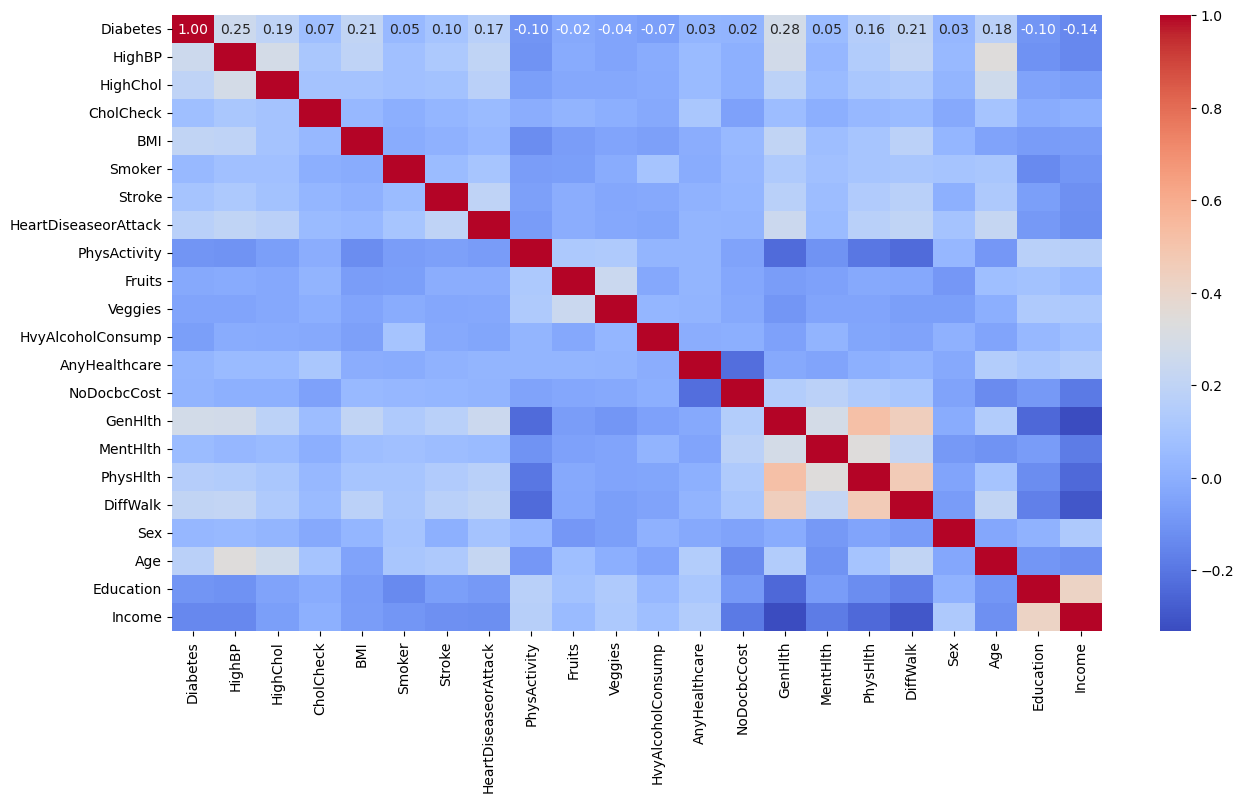

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

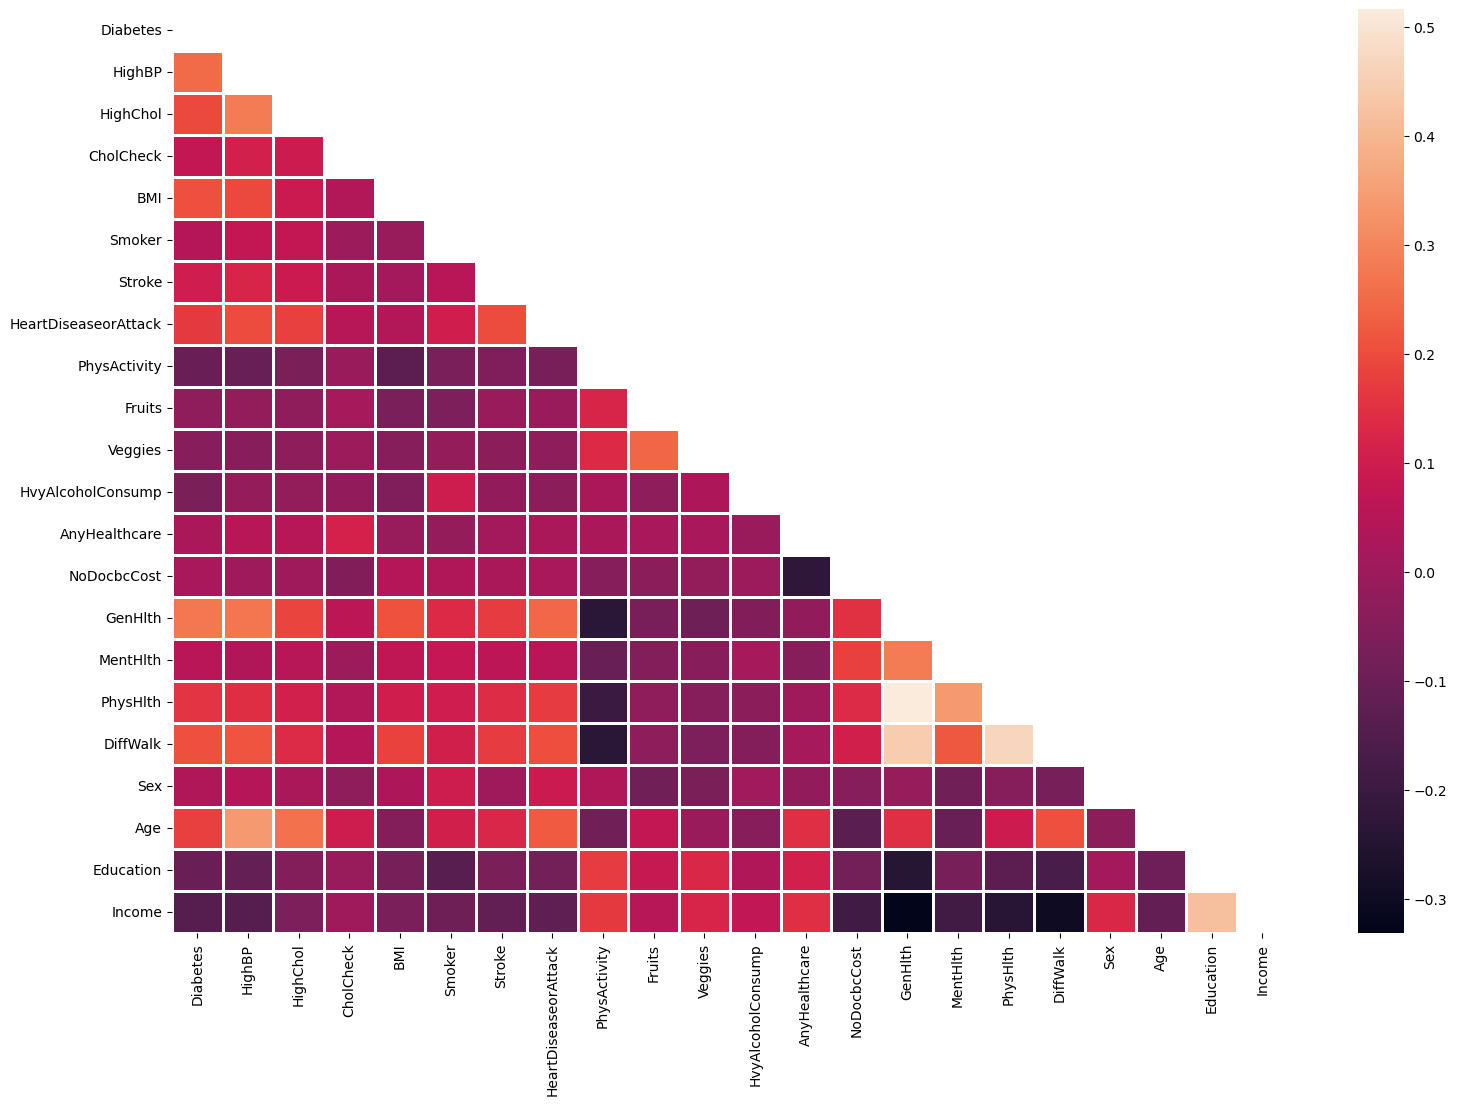

In [23]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the heat map above, there is a low and moderate correlation between the independent variables, indicating minimal multicollinearity, which is beneficial for building reliable predictive models for diabetes. This suggests that each variable contributes unique information to the prediction process, improving model interpretability and accuracy.

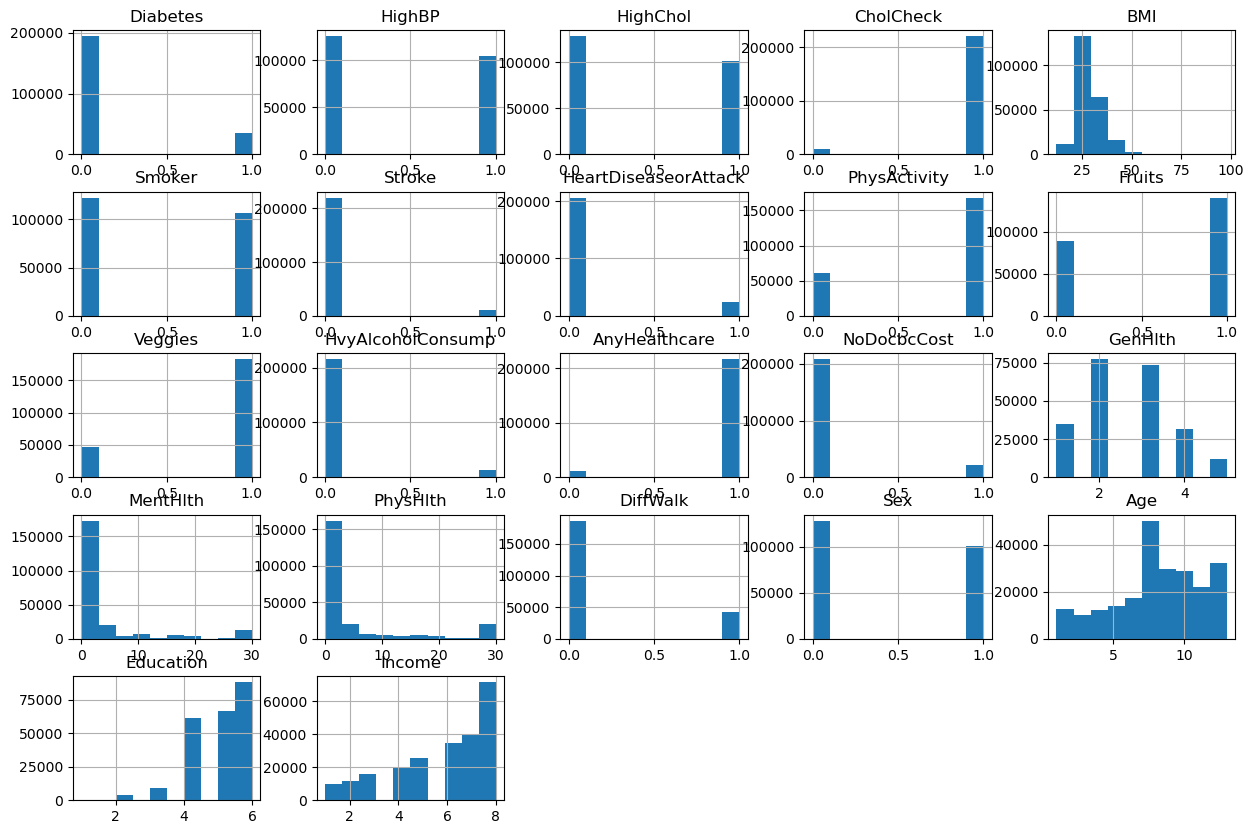

In [24]:
# Plot the histogram
df.hist(figsize=(15, 10))
plt.show()

Text(0.5, 1.0, 'Distribution of the BMI')

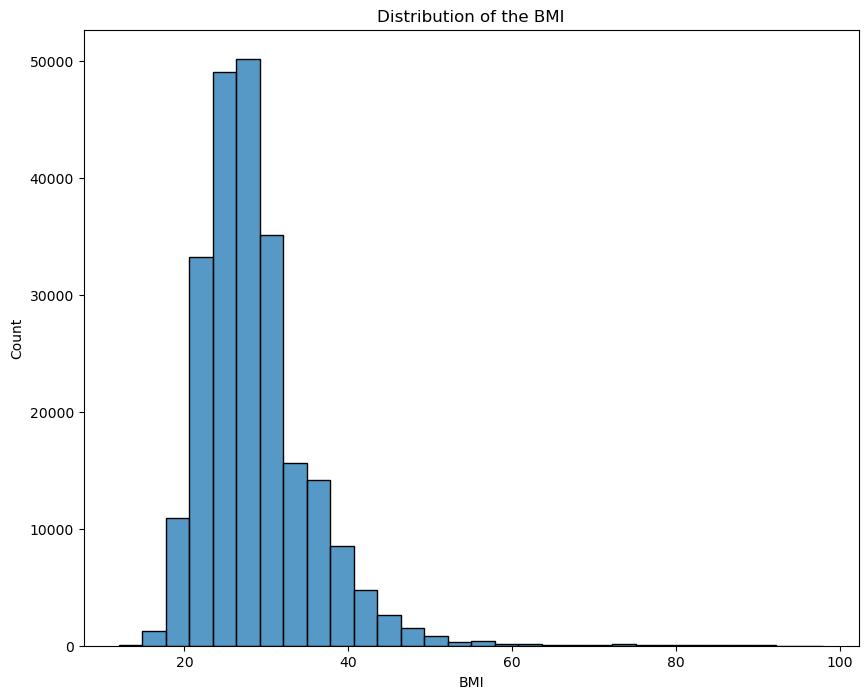

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='BMI',bins=30)
plt.xlabel('BMI')
plt.title('Distribution of the BMI')

In [26]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

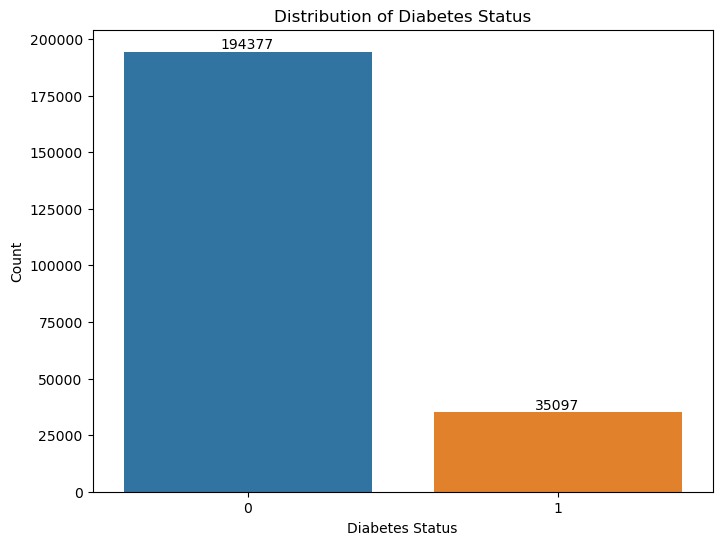

In [27]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='center',  # Align center
        fontsize=10, color='black', xytext=(0, 5),  # Style
        textcoords='offset points'
    )

plt.show()

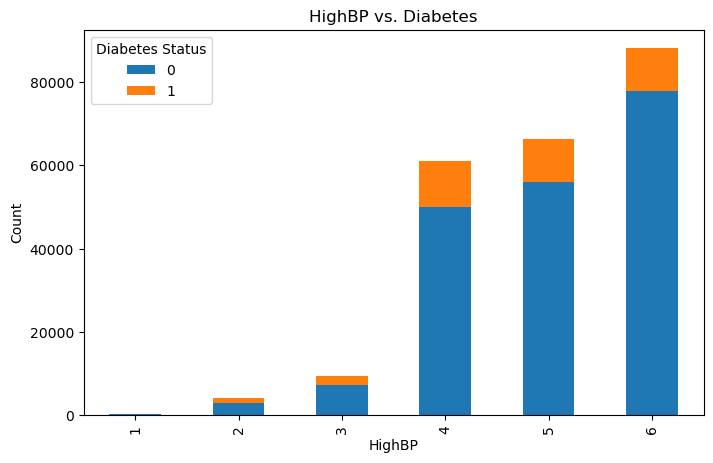

In [28]:
pd.crosstab(df['Education'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighBP vs. Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

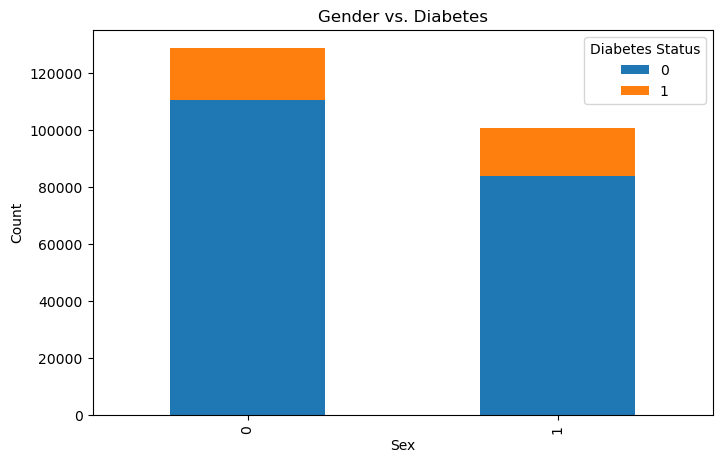

In [29]:
pd.crosstab(df['Sex'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Gender vs. Diabetes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

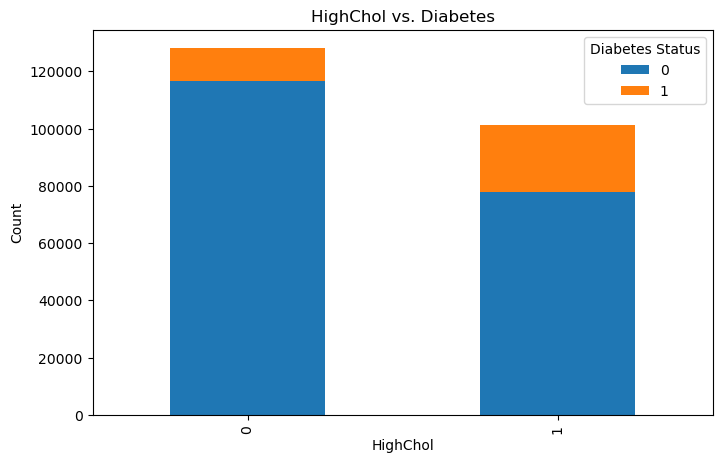

In [30]:
pd.crosstab(df['HighChol'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighChol vs. Diabetes')
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

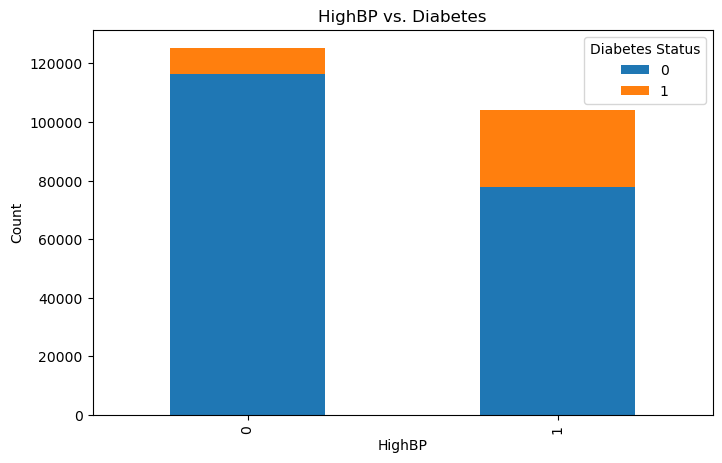

In [31]:
pd.crosstab(df['HighBP'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighBP vs. Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

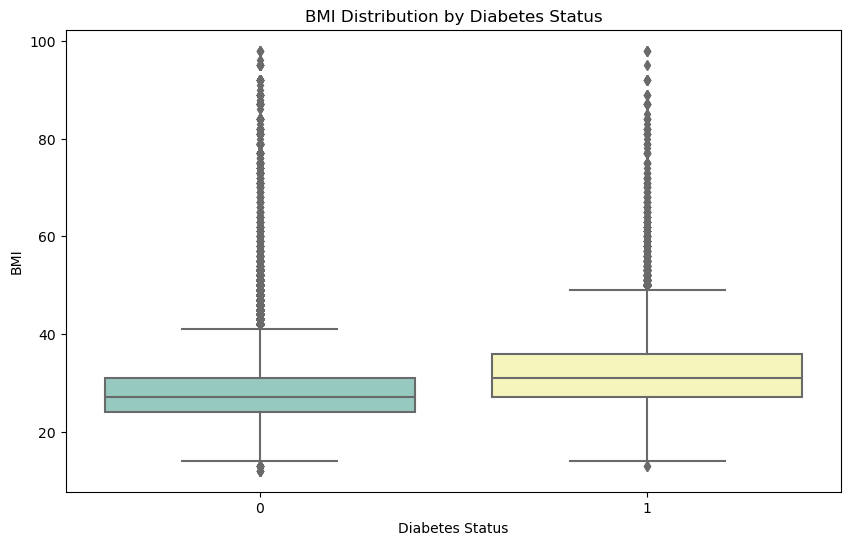

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes', y='BMI', data=df, palette='Set3')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

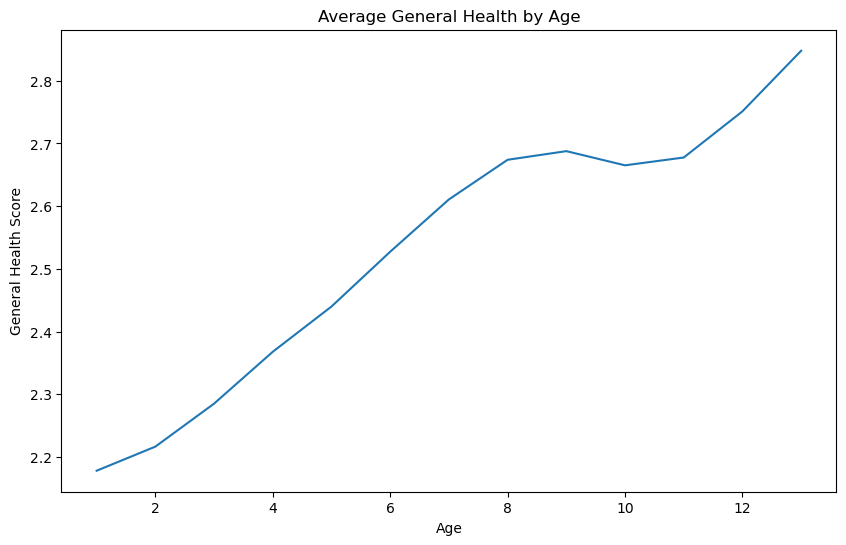

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='GenHlth', data=df, ci=None)
plt.title('Average General Health by Age')
plt.xlabel('Age')
plt.ylabel('General Health Score')
plt.show()

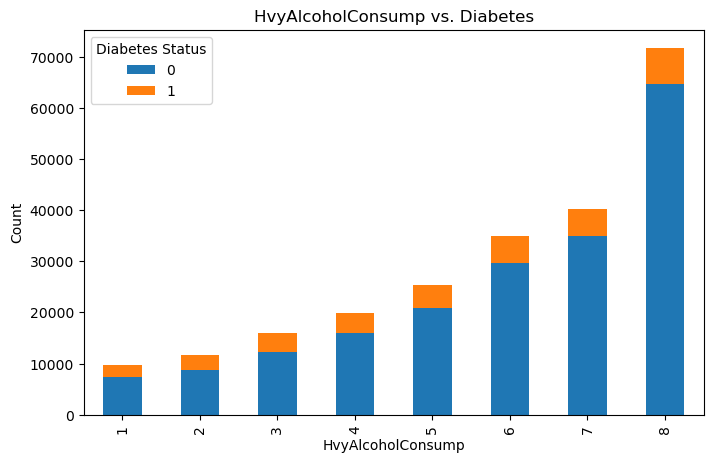

In [34]:
pd.crosstab(df['Income'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HvyAlcoholConsump vs. Diabetes')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

## Data Preprocessing

In [35]:
df['Diabetes'].value_counts()

Diabetes
0    194377
1     35097
Name: count, dtype: int64

In [36]:
X=df.drop(["Diabetes"],axis=1)
y=df["Diabetes"]

In [37]:
#smote=SMOTE(sampling_strategy='minority') 
#X,y=smote.fit_resample(X,y)
#y.value_counts()

In [38]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

X, y = nm.fit_resample(X,y)
y.value_counts()

Diabetes
0    35097
1    35097
Name: count, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [40]:
X_train_df = X_train

In [41]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Modeling

### Logistic Regression

In [42]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
#log_reg = LogisticRegression(C=1e5, solver='lbfgs')
log_reg.fit(X_train , y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [43]:
y_test_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

In [44]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

print("Training accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("Test accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_test, y_test_pred)))

print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Logistic Regression Evaluation:
Training accuracy of Logistic Regression is: 0.8516
Test accuracy of Logistic Regression is: 0.8500
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      7012
           1       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Confusion Matrix:
 [[6550  462]
 [1644 5383]]


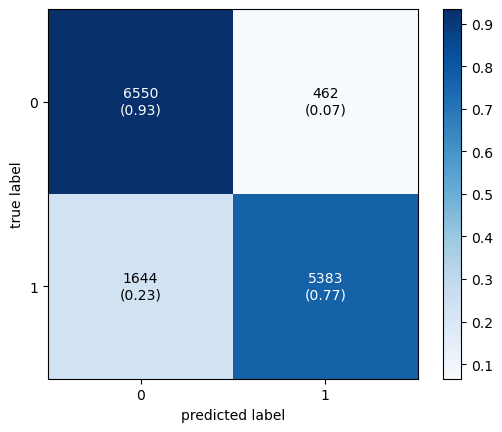

In [45]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

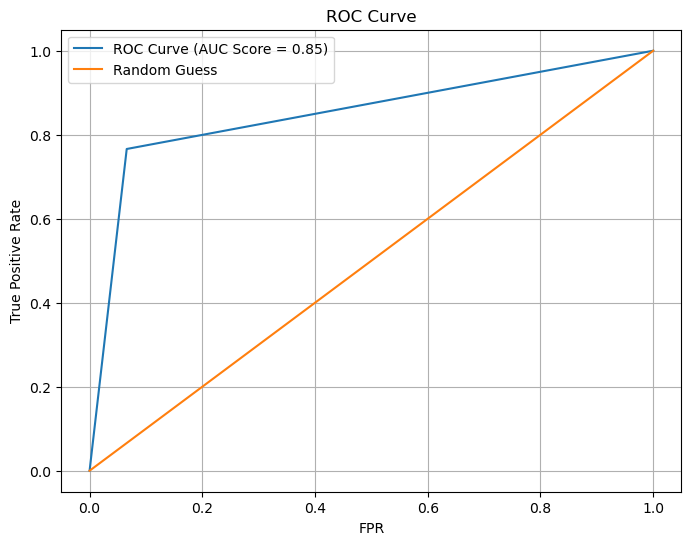

In [46]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
auc_score = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC Score = {auc_score:.2f})")
plt.plot([0,1],[0,1], label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

### Decision Trees

In [47]:
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 9)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [48]:
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)

In [49]:
# Decision Tree Evaluation
print("Decision Tree Evaluation:")

print("Training accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("Test accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_test, y_test_pred)))

print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Decision Tree Evaluation:
Training accuracy of Decision Tree is: 0.8491
Test accuracy of Decision Tree is: 0.8459
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      7012
           1       0.94      0.74      0.83      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.84     14039
weighted avg       0.86      0.85      0.84     14039

Confusion Matrix:
 [[6705  307]
 [1856 5171]]


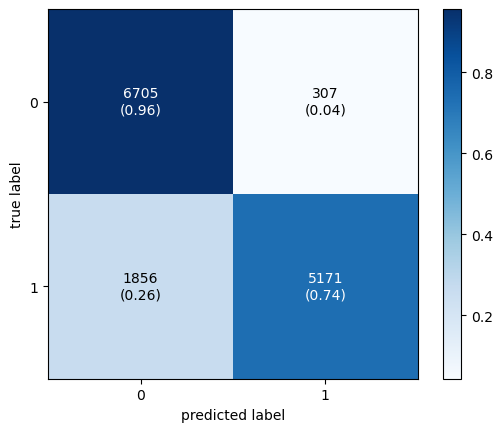

In [50]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

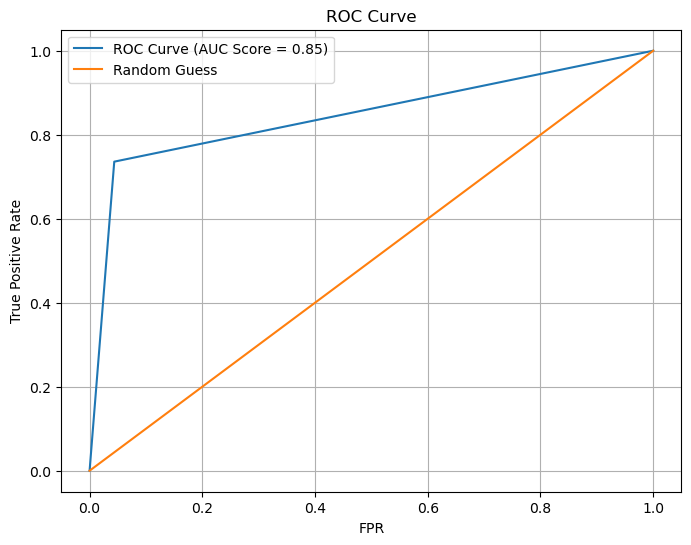

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
auc_score = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC Score = {auc_score:.2f})")
plt.plot([0,1],[0,1], label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

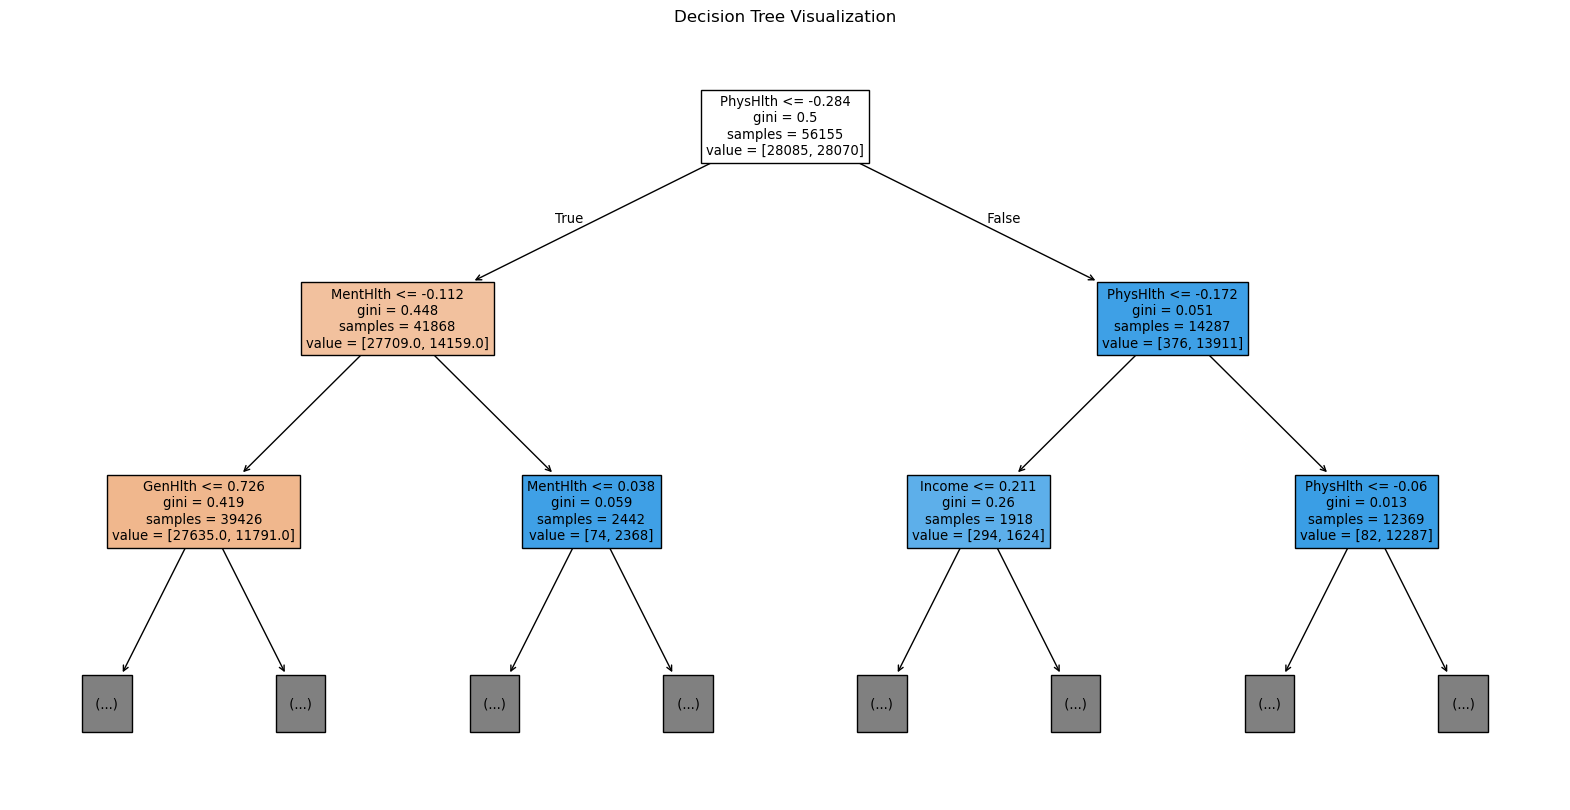

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `dtc` is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dtc, 
          filled=True, 
          feature_names=X_train_df.columns,  # Replace with the names of your features
          max_depth=2)  # Limit depth for clarity if desired
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

In [115]:
# Define the objective function
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 4, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    
    # Instantiate the Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Split the data

# Create the study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Output the best parameters and score
print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2024-12-04 21:35:04,690] A new study created in memory with name: no-name-9d6c1826-7f03-457f-858b-5a6df24fa900
[I 2024-12-04 21:35:16,635] Trial 0 finished with value: 0.8601039960111119 and parameters: {'n_estimators': 66, 'max_depth': 24, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8601039960111119.
[I 2024-12-04 21:35:20,235] Trial 1 finished with value: 0.8648764156991239 and parameters: {'n_estimators': 86, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8648764156991239.
[I 2024-12-04 21:35:22,831] Trial 2 finished with value: 0.8573260203718214 and parameters: {'n_estimators': 64, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.8648764156991239.
[I 2024-12-04 21:35:28,785] Trial 3 finished with value: 0.8578958615285989 and

Best params: {'n_estimators': 84, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}
Best score: 0.8651613362775127


In [122]:
# Configure the Random Forest model with adapted parameters
rf_params = {
    'n_estimators': 84,       # Number of trees
    'max_depth': 18,            # Maximum depth of trees
    'min_samples_split': 8,    # Default, adjust if needed
    'min_samples_leaf': 4,     # Default, adjust if needed
    'max_features': 'log2',    # Equivalent to colsample_bytree
    'bootstrap': False          # Default subsample behavior in Random Forest
}

# Instantiate the Random Forest model
random_forest = RandomForestClassifier(**rf_params, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=18, max_features='log2',
                       min_samples_leaf=4, min_samples_split=8, n_estimators=84,
                       random_state=42)

In [123]:
y_test_pred_rf = random_forest.predict(X_test)
y_train_pred_rf = random_forest.predict(X_train)

In [124]:
print("Random Forest Evaluation:")

print("Training accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_train, y_train_pred_rf)))
print("Test accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_test, y_test_pred_rf)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

Random Forest Evaluation:
Training accuracy of Random Forest is: 0.8890
Test accuracy of Random Forest is: 0.8652
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      7012
           1       0.95      0.78      0.85      7027

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.86     14039
weighted avg       0.88      0.87      0.86     14039

Confusion Matrix:
 [[6698  314]
 [1579 5448]]


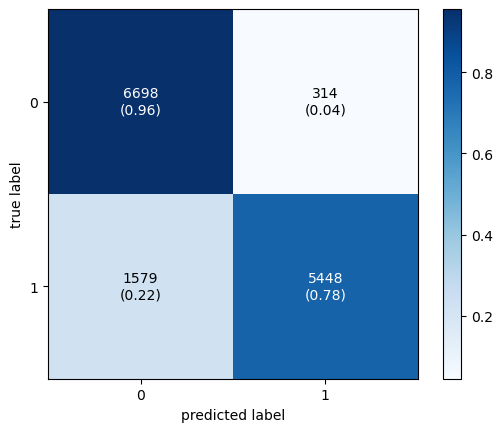

In [125]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_rf)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

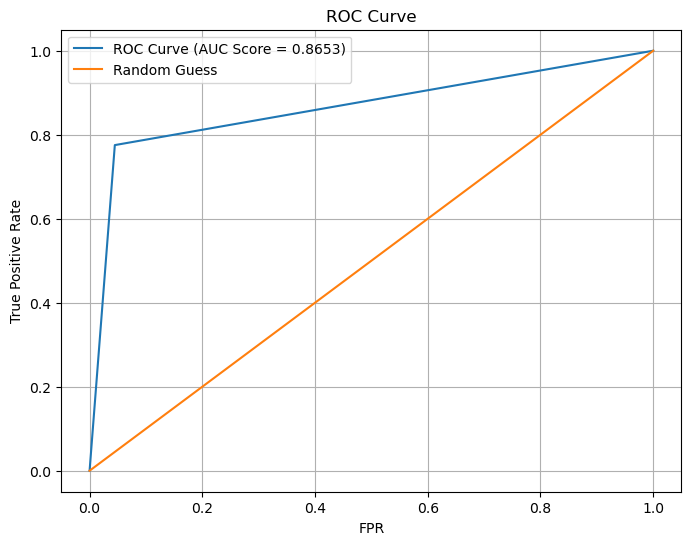

In [129]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_rf)
auc_score = roc_auc_score(y_test, y_test_pred_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC Score = {auc_score:.4f})")
plt.plot([0,1],[0,1], label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

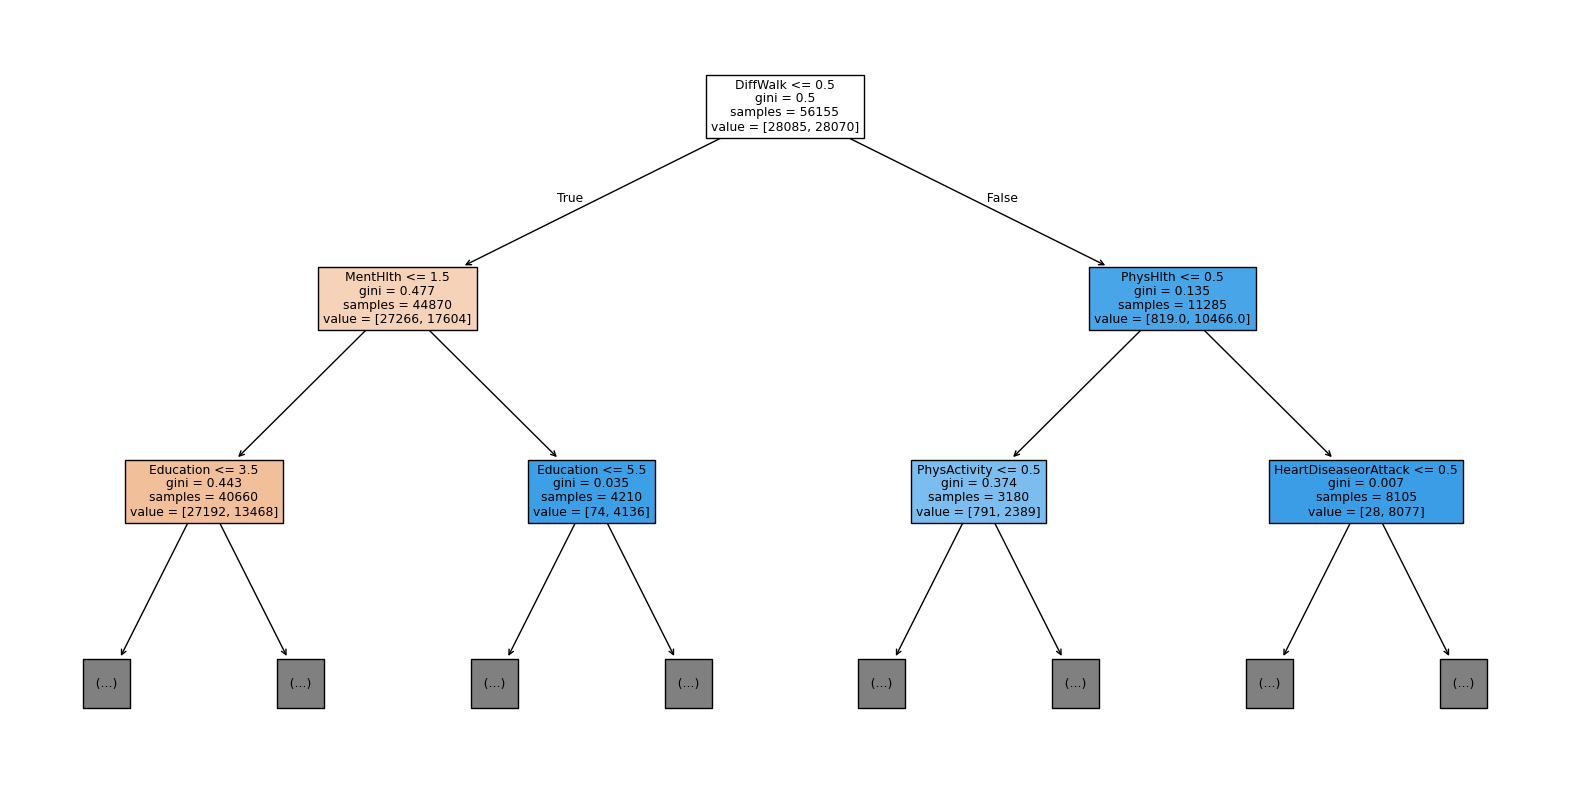

In [127]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your RandomForestClassifier
# Let's visualize the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, max_depth=2)
plt.show()

### XGBoost

In [114]:
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'alpha': trial.suggest_float('alpha', 0, 10),
        'lambda': trial.suggest_float('lambda', 0, 10),
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters
print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2024-12-04 21:31:44,349] A new study created in memory with name: no-name-4540f653-f75b-4845-b497-b93d070cd21d
[I 2024-12-04 21:31:46,543] Trial 0 finished with value: 0.8671557803262341 and parameters: {'learning_rate': 0.14594610618569895, 'max_depth': 9, 'subsample': 0.7627376665144548, 'colsample_bytree': 0.8245686383461206, 'n_estimators': 150, 'gamma': 1.947168163686888, 'alpha': 8.599850014997013, 'lambda': 2.339798837048239}. Best is trial 0 with value: 0.8671557803262341.
[I 2024-12-04 21:31:47,376] Trial 1 finished with value: 0.8666571693140537 and parameters: {'learning_rate': 0.16642476949514384, 'max_depth': 7, 'subsample': 0.9821882304079653, 'colsample_bytree': 0.8940245881415232, 'n_estimators': 114, 'gamma': 3.521080507751513, 'alpha': 3.09588959199399, 'lambda': 8.580131163561532}. Best is trial 0 with value: 0.8671557803262341.
[I 2024-12-04 21:31:48,335] Trial 2 finished with value: 0.866016098012679 and parameters: {'learning_rate': 0.22583935556760124, 'max_de

Best params: {'learning_rate': 0.272068108805666, 'max_depth': 5, 'subsample': 0.6914389174132841, 'colsample_bytree': 0.6067743953523305, 'n_estimators': 163, 'gamma': 0.9288053702477295, 'alpha': 5.348139036666385, 'lambda': 7.564517645216195}
Best score: 0.8702899066885106


In [103]:
best_params = {
    'learning_rate': 0.2642128742193229,
    'max_depth': 4,
    'subsample': 0.5048654537929281,
    'colsample_bytree': 0.9898693080631816,
    'n_estimators': 154,
    'gamma': 0.016723322410014507,
    'alpha': 7.470315728819328,
    'lambda': 9.619035705108782,
    'objective': 'binary:logistic'  # Add objective for classification
}
# instantiate the classifier 
xg = XGBClassifier(**params)



# fit the classifier to the training data
xg.fit(X_train, y_train)

XGBClassifier(alpha=20, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [104]:
y_test_pred_xg = xg.predict(X_test)
y_train_pred_xg = xg.predict(X_train)

In [105]:
print("xgBoost Evaluation:")

print("Training accuracy of xgBoost is: {:.4f}".format(accuracy_score(y_train, y_train_pred_xg)))
print("Test accuracy of xgBoost is: {:.4f}".format(accuracy_score(y_test, y_test_pred_xg)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xg))

xgBoost Evaluation:
Training accuracy of xgBoost is: 0.8684
Test accuracy of xgBoost is: 0.8650
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      7012
           1       0.93      0.79      0.85      7027

    accuracy                           0.87     14039
   macro avg       0.87      0.87      0.86     14039
weighted avg       0.87      0.87      0.86     14039

Confusion Matrix:
 [[6593  419]
 [1476 5551]]


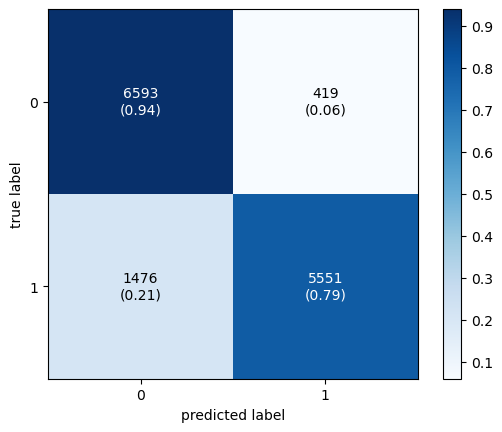

In [106]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_xg)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

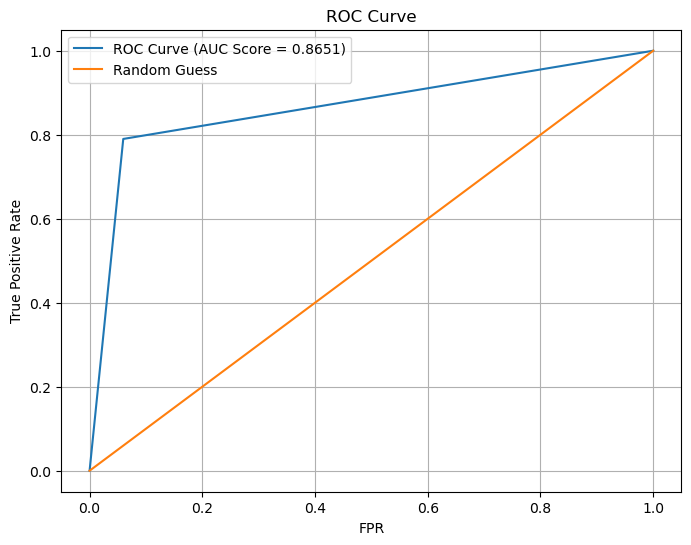

In [128]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_xg)
auc_score = roc_auc_score(y_test, y_test_pred_xg)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC Score = {auc_score:.4f})")
plt.plot([0,1],[0,1], label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

### Support Vector Machines

In [ ]:
svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

In [ ]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=df.feature_names[0],
        ylabel=df.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

In [ ]:
y_test_pred = random_forest.predict(X_test)
y_train_pred = random_forest.predict(X_train)

In [ ]:
print("Support Vector Machines Evaluation:")

print("Training accuracy of SVM is: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("Test accuracy of SVM is: {:.4f}".format(accuracy_score(y_test, y_test_pred)))

print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

## Model Comparisons

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic', 'Decision Tree', 'Random Forest', 'XgBoost'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)